In [17]:
import numpy as np
import networkx as nx

In [3]:
A = np.array([[0,0,1,0,1],
              [1,0,1,0,1],
              [0,1,0,1,0],
              [1,0,1,0,1],
              [0,1,0,1,0]])

D = np.array([[2,0,0,0,0],
              [0,3,0,0,0],
              [0,0,2,0,0],
              [0,0,0,3,0],
              [0,0,0,0,2]])

P = A.T@np.linalg.inv(D)

In [41]:
alpha = 0.95
P_tilde = alpha*P + (1-alpha)*(1/P.shape[0])*(np.outer(np.ones(5), np.ones(5)))

In [42]:
P_tilde

array([[0.01      , 0.32666667, 0.01      , 0.32666667, 0.01      ],
       [0.01      , 0.01      , 0.485     , 0.01      , 0.485     ],
       [0.485     , 0.32666667, 0.01      , 0.32666667, 0.01      ],
       [0.01      , 0.01      , 0.485     , 0.01      , 0.485     ],
       [0.485     , 0.32666667, 0.01      , 0.32666667, 0.01      ]])

In [44]:
v = np.ones(5)

for _ in range(100):
    v = P_tilde@v

v

array([0.72565716, 1.0668271 , 1.07034432, 1.0668271 , 1.07034432])

In [48]:
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
nx.pagerank(G)

{0: 0.14986091063990162,
 1: 0.21151829212218567,
 2: 0.21355125255786342,
 3: 0.21151829212218567,
 4: 0.21355125255786342}

In [26]:
P_tilde@v

array([0.45064982, 0.66252421, 0.66470848, 0.66252421, 0.66470848])

In [39]:
np.linalg.eig(P_tilde)

(array([ 1.00000000e+00+0.j        , -2.50000000e-02+0.01443376j,
        -2.50000000e-02-0.01443376j, -8.61853650e-33+0.j        ,
         4.15567519e-19+0.j        ]),
 array([[-4.39748206e-01+0.j  , -5.77350269e-01+0.j  ,
         -5.77350269e-01-0.j  , -1.68110644e-17+0.j  ,
         -5.87202746e-17+0.j  ],
        [-4.47372873e-01+0.j  ,  4.33012702e-01-0.25j,
          4.33012702e-01+0.25j, -5.31601054e-01+0.j  ,
          7.07106781e-01+0.j  ],
        [-4.50741911e-01+0.j  , -1.44337567e-01+0.25j,
         -1.44337567e-01-0.25j, -4.66262071e-01+0.j  ,
         -1.20792303e-14+0.j  ],
        [-4.47372873e-01+0.j  ,  4.33012702e-01-0.25j,
          4.33012702e-01+0.25j,  5.31601054e-01+0.j  ,
         -7.07106781e-01+0.j  ],
        [-4.50741911e-01+0.j  , -1.44337567e-01+0.25j,
         -1.44337567e-01-0.25j,  4.66262071e-01+0.j  ,
          1.21524377e-14+0.j  ]]))

In [49]:
def viterbi(y, A, E, pi):
    K = A.shape[0]
    T = len(y)
    T1 = np.empty((K, T), 'd')
    T2 = np.empty((K, T), 'B')

    T1[:, 0] = pi * E[:, y[0]]
    T2[:, 0] = 0

    for i in range(1, T):
        T1[:, i] = np.max(T1[:, i - 1] * A.T * E[np.newaxis, :, y[i]].T, 1)
        T2[:, i] = np.argmax(T1[:, i - 1] * A.T, 1)

    x = np.empty(T, 'B')
    x[-1] = np.argmax(T1[:, T - 1])
    for i in reversed(range(1, T)):
        x[i - 1] = T2[x[i], i]

    return x, T1, T2

y = np.array([0,1,1,1,0,1])
A = np.array([[0.6, 0.25],[0.4, 0.75]])
E = np.array([[0.5,0.5], [0.3,0.7]])
init = np.array([0.5, 0.5])

viterbi(y, A, E, init)

(array([1, 1, 1, 1, 1, 1], dtype=uint8),
 array([[0.25      , 0.075     , 0.0225    , 0.00826875, 0.00434109,
         0.00130233],
        [0.15      , 0.07875   , 0.04134375, 0.02170547, 0.00488373,
         0.00256396]]),
 array([[0, 0, 0, 1, 1, 0],
        [0, 1, 1, 1, 1, 1]], dtype=uint8))

In [52]:
x = 1

for k in range(1000):
    grad = 3-8*x**3
    x = x+0.1*grad

x

0.7211247851537042

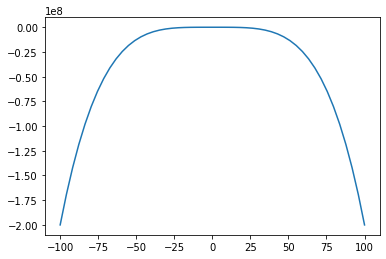

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-100, 100)
y = 4+3*x-2*x**4

plt.plot(x, y)

In [54]:
x

array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
        41.40816327,  43.42857143,  45.44897959,  47.46938776,
        49.48979592,  51.51020408,  53.53061224,  55.55102041,
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])